In [2]:
from PIL import Image
import imagehash
import numpy as np

hash_val_dog1 = imagehash.dhash(Image.open('dog_1.jpeg'))
hash_val_dog2 = imagehash.dhash(Image.open('dog_1.jpeg').rotate(90))

print(hash_val_dog1.binary_array().astype(int))
print(hash_val_dog2.binary_array_string())
print( np.sum(np.bitwise_xor(hash_val_dog1.binary_array(), hash_val_dog2.binary_array())))


print(hash_val_dog1 - hash_val_dog2)
# print(hash_val_dog1 + hash_val_dog2)

print(int(str(hash_val_dog1), 16) - int(str(hash_val_dog2), 16))


[0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1
 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1]
1011001000010100010111001100111001100110100010111000010100000100
35
35
-4306614570750778411


In [3]:
from os import listdir
from os.path import isfile, join

# images_path = '../images/'
images_path = './images_labeled/'
onlyfiles = [f for f in listdir(images_path) if isfile(join(images_path, f))]
print(len(onlyfiles))
print(onlyfiles[0])

16
DVUP3EBXcAACc_E.jpg


In [4]:
import numpy as np

file_hash = {}
file_hashes = np.zeros([len(onlyfiles), 2])

file_hashes_boolean = []
file_hashes_binary = []

file_paths = []
x_features =[]
x_transposed_features = []
# print(np.shape(file_hashes))

i = 0
for file_name in onlyfiles:
    file_paths.append(images_path + file_name)
    
    hash_0 = int(str(imagehash.average_hash(Image.open(images_path + file_name))), 16)
    hash_1 = int(str(imagehash.average_hash(Image.open(images_path + file_name).rotate(90))), 16)

    file_hash[file_name] = (hash_0 , hash_1)
    file_hashes[i, 0] = hash_0
    file_hashes[i, 1] = hash_1

    
#     hash_0 = imagehash.dhash(Image.open(images_path + file_name))
#     hash_1 = imagehash.dhash_vertical(Image.open(images_path + file_name))

    hash_0 = imagehash.average_hash(Image.open(images_path + file_name))
    hash_1 = imagehash.average_hash(Image.open(images_path + file_name))

    
    file_hashes_boolean.append([hash_0.binary_array() , hash_1.binary_array()])
    file_hashes_binary.append([hash_0.binary_array().astype(int) , hash_1.binary_array().astype(int)])
    
    x_features.append(hash_0.binary_array())
    
    
    i = i +1
    
print(len(file_hashes_binary))

16


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


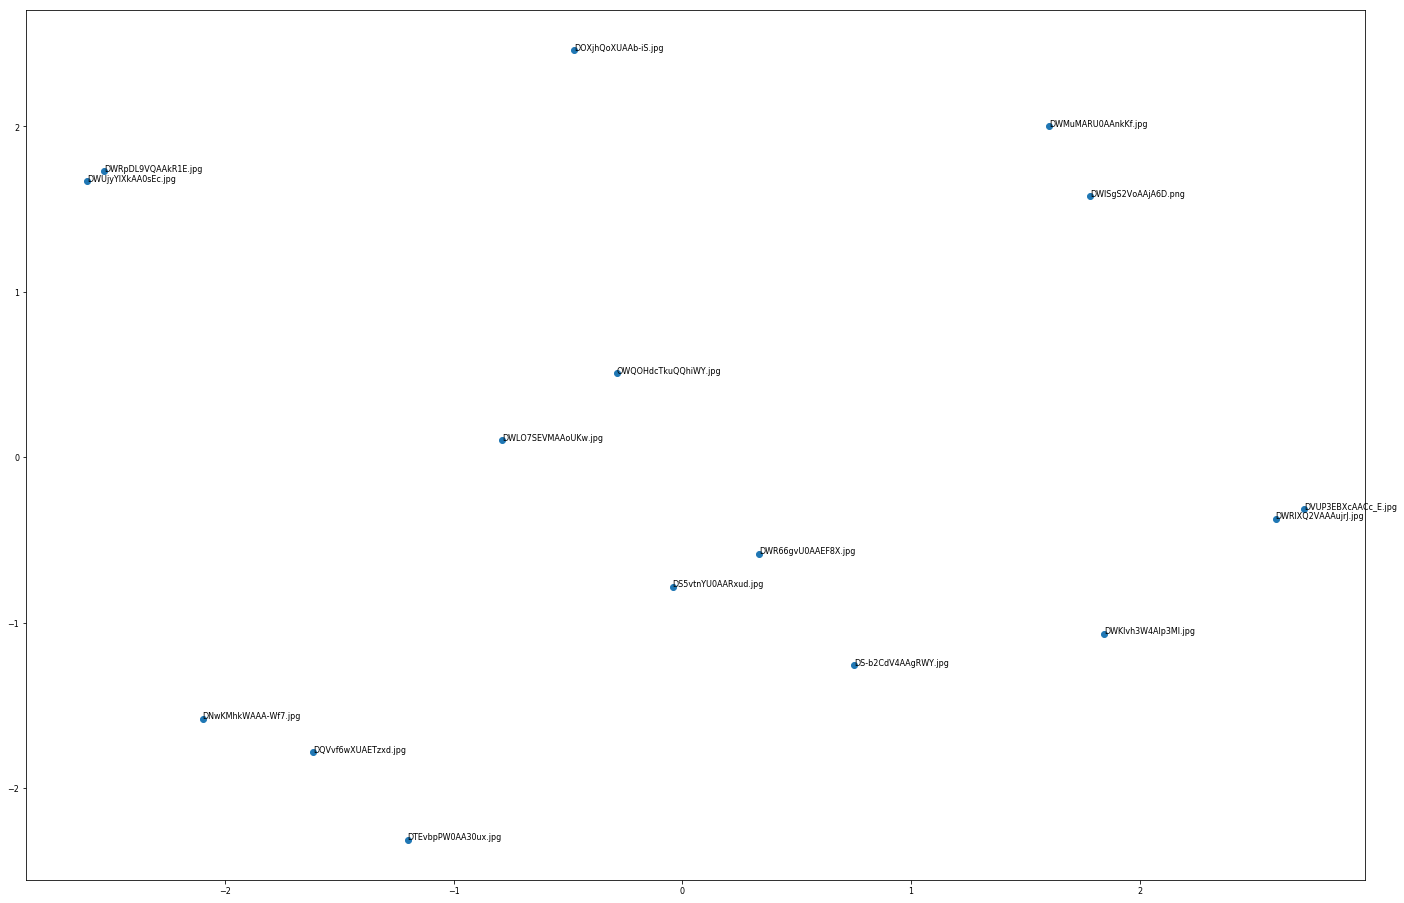

In [5]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

plt.figure(figsize=(24,16))


# fit a 2d PCA model to the vectors
X = x_features
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.vocab)
i = 0
for file_name in onlyfiles:
    plt.annotate(file_name, xy=(result[i, 0], result[i, 1]))
    i = i + 1
    
plt.show()

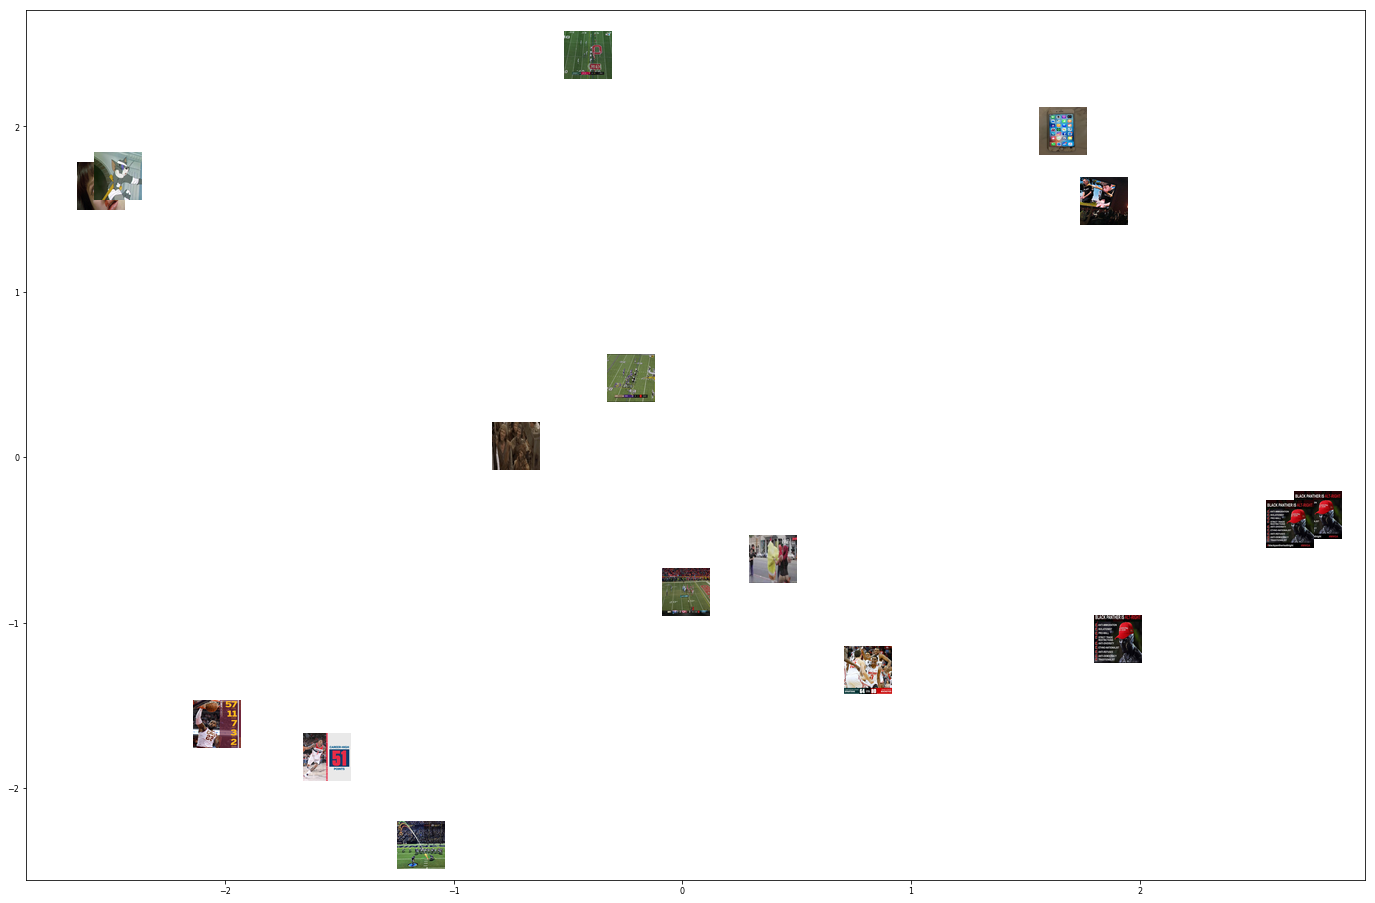

In [6]:


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

# plt.figure(figsize=(24,16))

fig, ax = plt.subplots()
fig.set_size_inches(24, 16)
# ax.axis([-3, 3, -3, 3])

size = 48, 48

# fit a 2d PCA model to the vectors
X = x_features
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
ax.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.vocab)
i = 0
for file_name in onlyfiles:

    xy_pixels = ax.transData.transform(np.vstack([result[i, 0], result[i, 1]]).T)
    xpix, ypix = xy_pixels.T

    # In matplotlib, 0,0 is the lower left corner, whereas it's usually the upper 
    # right for most image software, so we'll flip the y-coords...
    width, height = fig.canvas.get_width_height()
    

    im = Image.open(images_path + file_name)
    img = im.resize(size, Image.ANTIALIAS)

    # We need a float array between 0-1, rather than
    # a uint8 array between 0-255
    im = np.array(img).astype(np.float) / 255


#     fig.figimage(im,  result[i, 0], fig.bbox.ymax - height + result[i, 1], zorder=10)

    for xp, yp in zip(xpix, ypix):
#         print(result[i, 0], result[i, 1])
#         print '{x:0.2f}\t{y:0.2f}'.format(x=xp, y=yp)
        fig.figimage(im,  xp -200,  yp -150, zorder=10)
# 
    i = i + 1
    
plt.show()